In [1]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates
import datetime

In [2]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd 
import numpy as np
import os

### Anamoly detection using KDE only on malicious users in email scenario

Total anamolous instances: 7
['08-02-2010' '08-05-2010' '08-06-2010' '08-09-2010' '08-11-2010'
 '08-12-2010' '08-13-2010']
(157, 2)


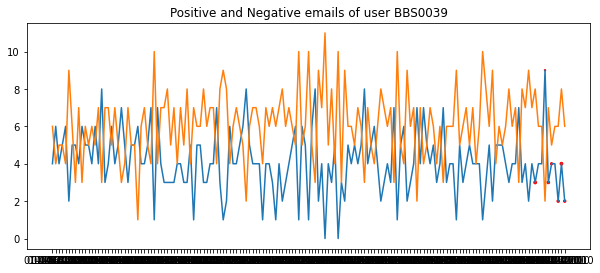

Total anamolous instances: 7
['09-28-2010' '09-29-2010' '09-30-2010' '10-01-2010' '10-02-2010'
 '10-03-2010' '10-04-2010']
(239, 2)


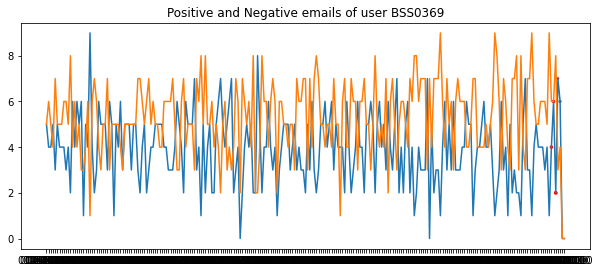

Total anamolous instances: 7
['10-06-2010' '10-07-2010' '10-08-2010' '10-12-2010' '10-13-2010'
 '10-14-2010' '10-15-2010']
(201, 2)


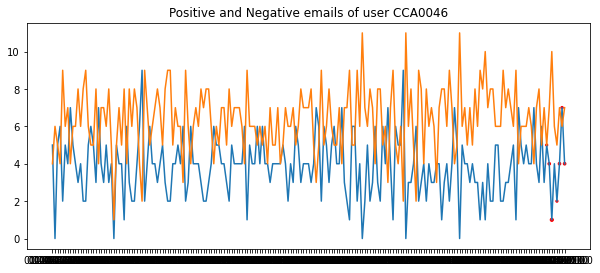

Total anamolous instances: 7
['06-02-2010' '06-03-2010' '06-07-2010' '06-08-2010' '06-09-2010'
 '06-10-2010' '06-11-2010']
(113, 2)


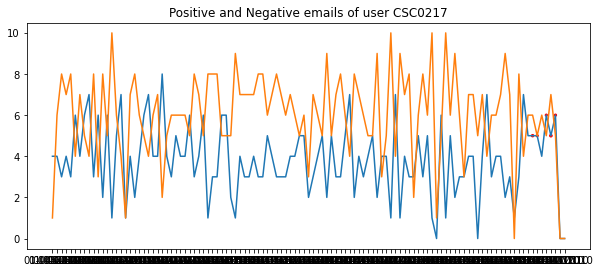

Total anamolous instances: 7
['06-10-2010' '06-11-2010' '06-14-2010' '06-15-2010' '06-16-2010'
 '06-17-2010' '06-18-2010']
(118, 2)


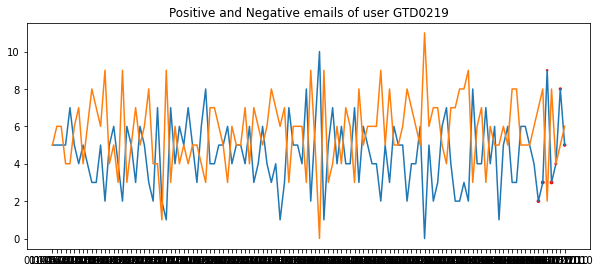

Total anamolous instances: 7
['07-06-2010' '07-07-2010' '07-08-2010' '07-09-2010' '07-13-2010'
 '07-14-2010' '07-16-2010']
(137, 2)


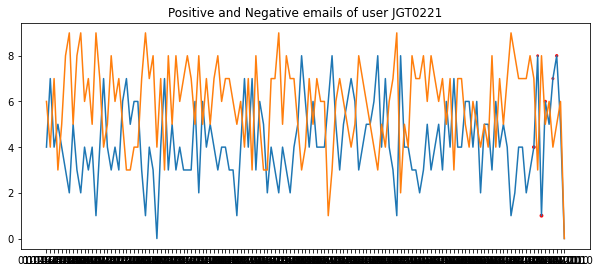

Total anamolous instances: 7
['12-17-2010' '12-20-2010' '12-22-2010' '12-27-2010' '12-28-2010'
 '12-29-2010' '12-30-2010']
(335, 2)


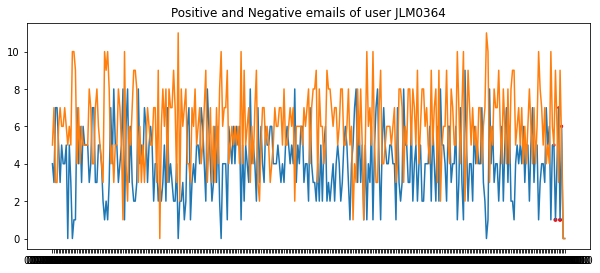

Total anamolous instances: 7
['07-15-2010' '07-16-2010' '07-19-2010' '07-20-2010' '07-21-2010'
 '07-22-2010' '07-23-2010']
(142, 2)


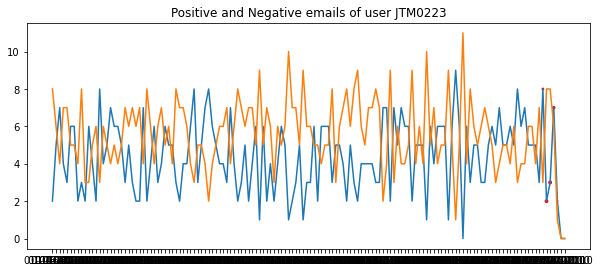

Total anamolous instances: 7
['10-26-2010' '10-27-2010' '11-01-2010' '11-02-2010' '11-03-2010'
 '11-04-2010' '11-05-2010']
(218, 2)


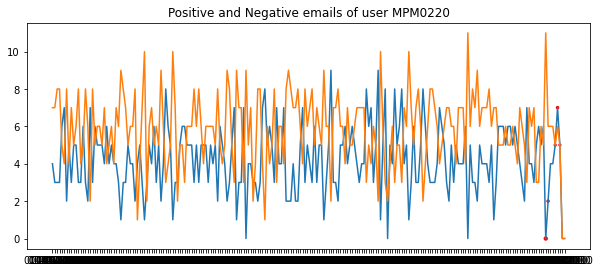

Total anamolous instances: 7
['12-01-2010' '12-02-2010' '12-03-2010' '12-06-2010' '12-07-2010'
 '12-09-2010' '12-10-2010']
(239, 2)


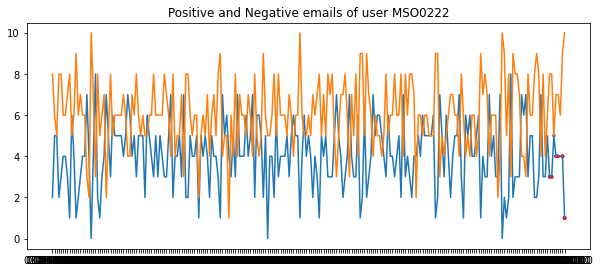

In [17]:
malicious_names=['BBS0039',
'BSS0369',
'CCA0046',
'CSC0217',
'GTD0219',
'JGT0221',
'JLM0364',
'JTM0223',
'MPM0220',
'MSO0222',
]
def KDE(names):
    for i in names:
        data=pd.read_csv(f'user_files\\{i}.csv')
#         data['str_date']=pd.to_datetime(data['str_date'])

        x_values = np.sort(data['str_date'].to_numpy())
        maxdate=x_values[len(x_values)-1]
        mindate=x_values[0]


        positive_negative=data.iloc[:,[1,3]].to_numpy()
        # print(positive_negative.shape)

        kernaldens = KernelDensity(kernel='gaussian', bandwidth=5.0).fit(positive_negative)
        scores = np.exp(kernaldens.score_samples(positive_negative))
        
        thresh1 = quantile(scores, 0.8)
#         thresh2 = quantile(scores, 0.2)
#         print(thresh1, thresh2)

        index = where(scores <= thresh1)
        index=list(index[0])
        index=index[-7: ]
        
#         print("len of index after deletion",len(index))

        print("Total anamolous instances:", len(index))
        values = positive_negative[index]
        
        anamolous_dates=x_values[index]
#         anamolous_dates=np.delete(anamolous_dates, np.arange(0,110))
        
        print(anamolous_dates)
        
        #     print("values at these indices:", values)
        plt.rcParams["figure.figsize"] = [8.50, 3.90]
        plt.rcParams["figure.autolayout"] = True
        
#         x_axis = [dt.strptime(str(d)[0:10], "%Y-%m-%d").date() for d in x_values]
        plt.title(f'Positive and Negative emails of user {i}')
        ax = plt.gca()

#         formatter = mdates.DateFormatter("%Y-%m-%d")
#         ax.xaxis.set_major_formatter(formatter)
#         locator = mdates.DayLocator()
#         ax.set_xlim([mindate, maxdate])
        

        print(positive_negative.shape)
#         ax.xaxis.set_major_locator(locator)
#         ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))

        plt.plot(x_values, positive_negative)
        plt.scatter(index,values[:,0], values[:,1], color='r')
        plt.show()
        
KDE(malicious_names)

### Applying KDE on non-malicious users in email scenario

Total anamolous instances: 7
['11-09-2010' '11-10-2010' '11-11-2010' '11-12-2010' '11-15-2010'
 '11-16-2010' '11-17-2010']
(225, 2)


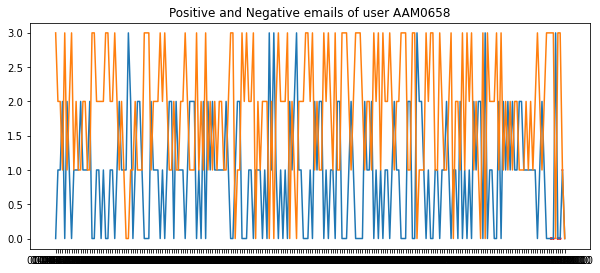

Total anamolous instances: 7
['09-28-2010' '09-29-2010' '09-30-2010' '10-01-2010' '10-04-2010'
 '10-06-2010' '10-07-2010']
(196, 2)


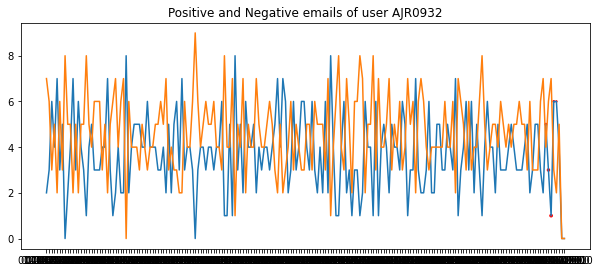

Total anamolous instances: 7
['08-16-2010' '08-17-2010' '08-18-2010' '08-19-2010' '08-20-2010'
 '08-23-2010' '08-24-2010']
(165, 2)


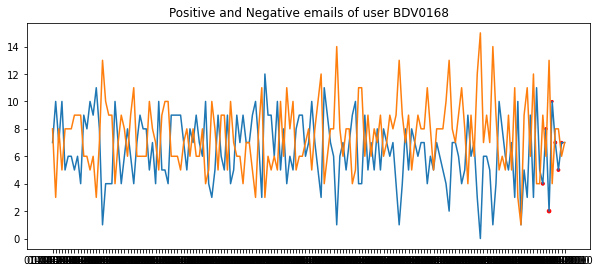

Total anamolous instances: 7
['07-13-2010' '07-14-2010' '07-15-2010' '07-20-2010' '07-21-2010'
 '07-23-2010' '07-27-2010']
(144, 2)


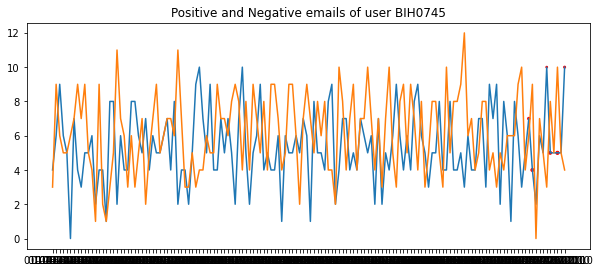

Total anamolous instances: 7
['10-06-2010' '10-07-2010' '10-08-2010' '10-11-2010' '10-12-2010'
 '10-13-2010' '10-15-2010']
(201, 2)


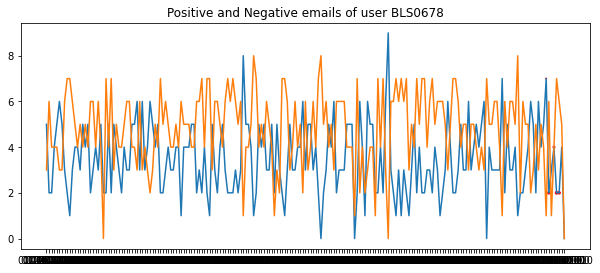

Total anamolous instances: 7
['10-25-2010' '10-26-2010' '10-27-2010' '10-28-2010' '10-29-2010'
 '11-01-2010' '11-02-2010']
(213, 2)


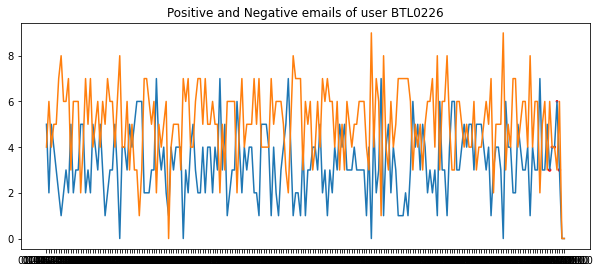

Total anamolous instances: 7
['08-26-2010' '08-27-2010' '08-30-2010' '08-31-2010' '09-01-2010'
 '09-02-2010' '09-03-2010']
(172, 2)


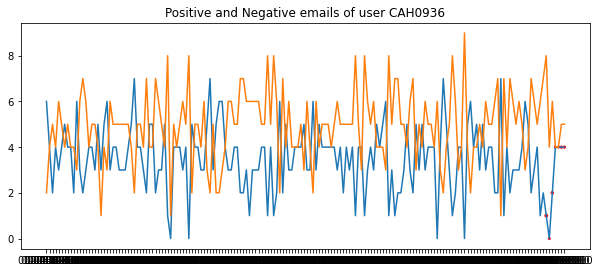

Total anamolous instances: 7
['12-20-2010' '12-21-2010' '12-22-2010' '12-27-2010' '12-28-2010'
 '12-29-2010' '12-30-2010']
(290, 2)


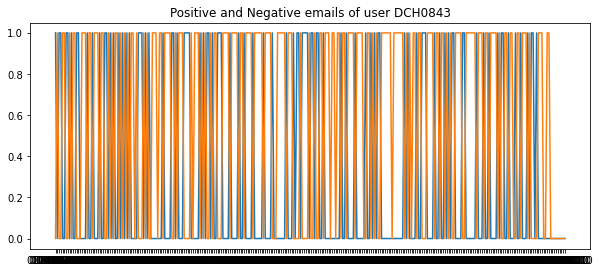

Total anamolous instances: 7
['08-09-2010' '08-10-2010' '08-11-2010' '08-12-2010' '08-13-2010'
 '08-16-2010' '08-17-2010']
(159, 2)


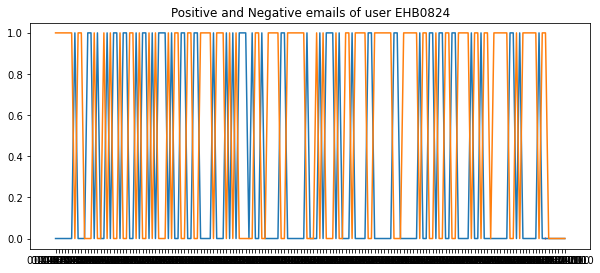

In [18]:
non_malicious=['AAM0658',
'AJR0932',
'BDV0168',
'BIH0745',
'BLS0678',
'BTL0226',
'CAH0936',
'DCH0843',
'EHB0824',
]
KDE(non_malicious)

<class 'datetime.date'>


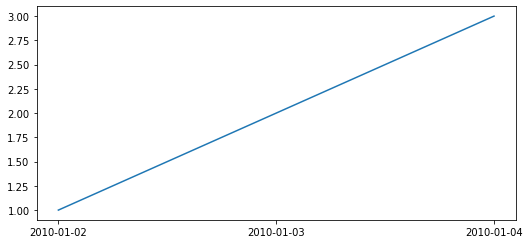

In [5]:


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dates = ["2010-01-02T00:00:00.000000000", "2010-01-03T00:00:00.000000000", "2010-01-04T00:00:00.000000000"]
x_values = [dt.strptime(d[0:10], "%Y-%m-%d").date() for d in dates]
y_values = [[1], [2], [3]]
print(type(x_values[0]))
ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)

plt.show()

In [6]:
data=pd.read_csv(f'user_files\\BBs0039.csv')
data['str_date']=pd.to_datetime(data['str_date'])
# d=list(data['str_date'].to_numpy())
# clean_dates=[]
# for i in d:
#     i=str(i).split('T')
#     clean_dates.append(i[0])
# clean_dates
# from datetime import datetime
# format_data = "%m/%d/%y "
# clean_dates=data['str_date'].to_numpy()
# for i in clean_dates:
#     date = datetime.strptime(i, format_data)
# data['str_date'].to_numpy()

In [7]:
# x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y = [8, 7, 6, 4, 5, 6, 7, 8, 9, 10]
# plt.style.use('seaborn')
# plt.xticks(np.arange(11))
# plt.yticks(np.arange(11))
  
# plt.scatter(x, y, s=100, c='g')
# plt.plot(x,y)
# plt.title("Scatter Plot", fontsize=25)
  
# plt.xlabel('x-axis', fontsize=18)
# plt.ylabel('y-axis', fontsize=18)
  
# plt.show()